In [27]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dati

C'è una comunità di 80 orsetti nella foresta. Gli orsetti anziani sono 16, e il loro numero è fisso. Le orsette sono sempre il 25% degli orsetti totali.
I rimanenti orsetti si dividono in 11 sottospecie diverse (per colore). ciascuna sottospecie rappresenta sempre una % fissa rispetto al numero totale di orsetti della comunità. 

In [22]:
# popolazione iniziale
p0 = 80 

# numero di vecchi
v = 16 

# numero di femmine
def femmine(popolazione):
    return popolazione*0.25

# composizione iniziale come funzione della popolazione
def composizione(p=p0):
    composizione = {
        'bruni'       : 0.2363*p,
        'gialli'      : 0.1894*p,
        'beige'       : 0.1486*p,
        'grigi'       : 0.0653*p,
        'neri'        : 0.0651*p,
        'verdi'       : 0.0634*p,
        'rossi'       : 0.0577*p,
        'bianchi'     : 0.0576*p,
        'blu'         : 0.0417*p,
        'arancioni'   : 0.0401*p,
        'trasparenti' : 0.0347*p
    }
    return composizione


## Domanda n.1
Siccome non è carino amputare gli orsetti, si procede a degli arrotondamenti (per effetto o per eccesso prendendo lo 0,5 come linea), ma poi il totale non torna. Come si fa a farlo tornare? 

### Osservazioni

* Prima di porcedere osservo che l'età e il genere non sono importanti per rispondere alla domanda, perchè l'attributo che interessa è il colore
* il fatto che gli anziani siano in numero costante rispetto al totale permetterà di calcolare il tasso di mortalità in fuzione della crescita della popolazione
* come sopra, il fatto che le femmine siano in percentuale costante rispetto al totale permette uno studio sulla distribuizione di genere nella popolazione ma non dice nulla sul colore

In [23]:
# controllo che la somma delle percentuali dia come risultato 100, o in maniera equivalente, che la somma
# della composizione mi dia il numero totale della popolazione iniziale
s=0
for i in composizione(p0).values():
    s+=i
print(s)

79.992


Parte male visto che neanche sommando la composizione iniziale arriva a cifra tonda.

A sto punto faccio il grafico della distanza fra la popolazione totale e la somma della composizione dove ogni colore è stato arrotondato:

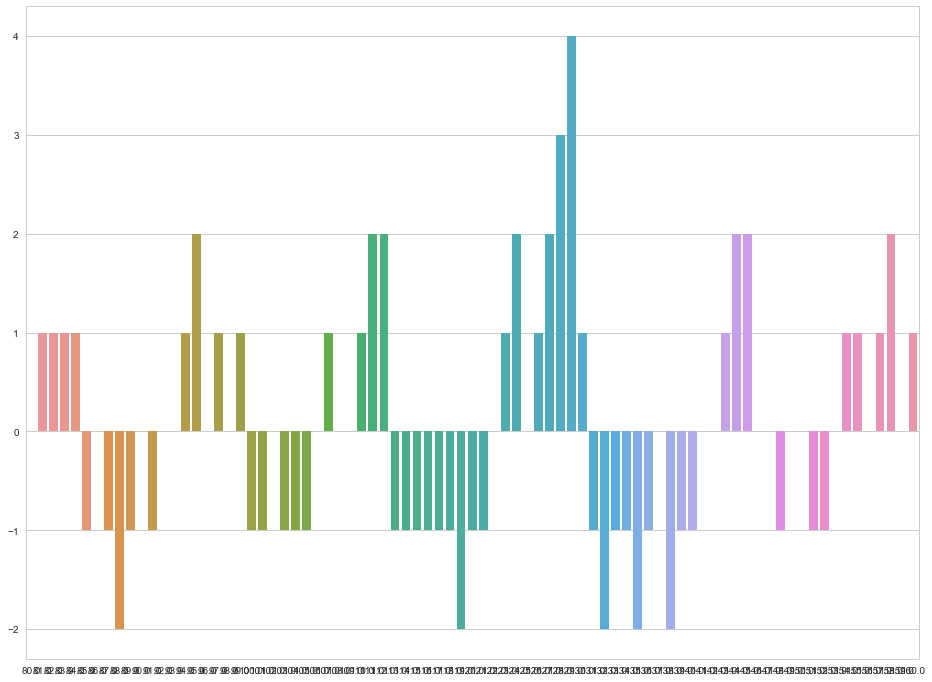

In [77]:
x=sp.linspace(80,160, num = 81) # 80 punti equispaziati
y=[] # questo servirà a collezionare i risultati

for p in x: # p è un valore intero fra 80 e 160
    
    # per un certo valore della popolazione totale sommo tutti i componenti
    somma = sp.sum([round(i) for i in composizione(p).values()])
    # funzione errore, ossia se p=somma allora err=0, altrimenti rimane un residuo che viene assegnato ad err
    err = p-somma
    # colleziono il risultato per questo valore di popolazione totale p
    y.append(err)

# faccio il grafico dei residui
fig, ax = plt.subplots(figsize=(16,12))
sns.set(style="whitegrid")
ax=sns.barplot(x, y)

Come si vede la fuzione errore va a zero ogni tanto ma non è detto che avendo arrotondato la percentuale risultatnte di ogni colore sia azzeccata.
Per vedere se succede gli dico di stampare solo il caso in cui la composizione sia esattamente quella desiderata.

In [81]:
x=80
nsol=5
sol=0
while True:
    colori = composizione(x).values()
    # per un certo valore della popolazione totale sommo tutti i componenti
    somma = sp.sum([i for i in colori])
    # per lo stesso valore di popolazione sommo tutti i componenti arrotondando ogni colore
    somma_arrotondata = sp.sum([round(i) for i in colori])
    # funzione errore, qui controllo che la somma dei valori esatti e di quelli arrotondati coincidano
    err = somma-somma_arrotondata
    if err==0.0:
        print('Trovata composizione esatta per una popolazione di {:3.0f} abitanti!'.format(x))
        for key, val in composizione(x).items():
            print('{:15s}:{:5.0f}'.format(key, val))
        sol+=1
        if sol>=nsol:
            break
    x+=1 #incremento la popolazione di uno se il check qui sopra non è andato bene

Trovata composizione esatta per una popolazione di 10000 abitanti!
bruni          : 2363
gialli         : 1894
beige          : 1486
grigi          :  653
neri           :  651
verdi          :  634
rossi          :  577
bianchi        :  576
blu            :  417
arancioni      :  401
trasparenti    :  347
Trovata composizione esatta per una popolazione di 20000 abitanti!
bruni          : 4726
gialli         : 3788
beige          : 2972
grigi          : 1306
neri           : 1302
verdi          : 1268
rossi          : 1154
bianchi        : 1152
blu            :  834
arancioni      :  802
trasparenti    :  694
Trovata composizione esatta per una popolazione di 30000 abitanti!
bruni          : 7089
gialli         : 5682
beige          : 4458
grigi          : 1959
neri           : 1953
verdi          : 1902
rossi          : 1731
bianchi        : 1728
blu            : 1251
arancioni      : 1203
trasparenti    : 1041
Trovata composizione esatta per una popolazione di 40000 abitanti!
bruni 

## Domanda n.2
La comunità di orsetti cresce. Quali dimensioni deve raggiungere la comunità di orsetti perchè gli orsetti grigi, rossi e arancioni ottengano un accrescimento del loro numero in maniera comparativamente "più vantaggiosa" rispetto all'accrescimento degli orsetti bruni e gialli ?

Se la risposta rende possibili più dimensioni totali della comunità di orsetti, tieni presente che essa non può mai superare le 160 unità.

#### Risposta
Questa domanda non ha significato: se la composizione percentuale rimane quella, non ci sarà mai nessun sorpasso di una parte della popolazione sull'altra 